# Proyek Akhir: Menyelesaikan Permasalahan HR

- Nama: Aida Kusuma Wardah
- Email: aidakusuma1331@gmail.com
- Id Dicoding: aiveth

## Persiapan

### Menyiapkan library yang dibutuhkan

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Menyiapkan data yang akan diguankan

In [29]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv"
data = pd.read_csv(url)
data.head()


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Undestanding

In [30]:
print("1. Ringkasan Statistik Data:")
print(data.describe())

1. Ringkasan Statistik Data:
        EmployeeId          Age    Attrition    DailyRate  DistanceFromHome  \
count  1470.000000  1470.000000  1058.000000  1470.000000       1470.000000   
mean    735.500000    36.923810     0.169187   802.485714          9.192517   
std     424.496761     9.135373     0.375094   403.509100          8.106864   
min       1.000000    18.000000     0.000000   102.000000          1.000000   
25%     368.250000    30.000000     0.000000   465.000000          2.000000   
50%     735.500000    36.000000     0.000000   802.000000          7.000000   
75%    1102.750000    43.000000     0.000000  1157.000000         14.000000   
max    1470.000000    60.000000     1.000000  1499.000000         29.000000   

         Education  EmployeeCount  EnvironmentSatisfaction   HourlyRate  \
count  1470.000000         1470.0              1470.000000  1470.000000   
mean      2.912925            1.0                 2.721769    65.891156   
std       1.024165            0.0 

In [31]:
print("\n2. Informasi Dataset:")
print(f"Jumlah Baris: {data.shape[0]}")
print(f"Jumlah Kolom: {data.shape[1]}")


2. Informasi Dataset:
Jumlah Baris: 1470
Jumlah Kolom: 35


In [32]:
print("\n3. Missing Values:")
print(data.isnull().sum())


3. Missing Values:
EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance     

In [33]:
print("\n4. Distribusi Attrition:")
print(data['Attrition'].value_counts(normalize=True))


4. Distribusi Attrition:
Attrition
0.0    0.830813
1.0    0.169187
Name: proportion, dtype: float64


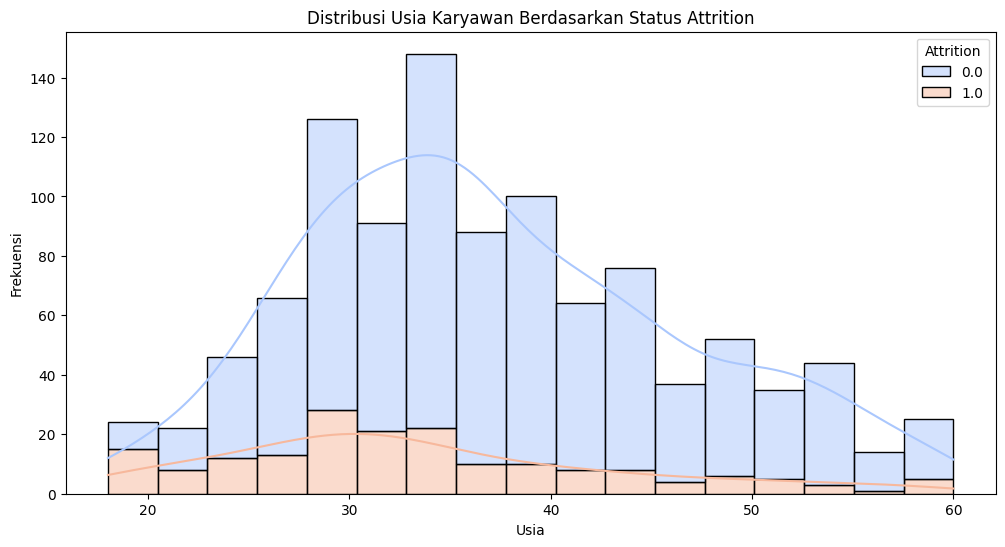

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Age', hue='Attrition', multiple='stack', kde=True, palette='coolwarm')
plt.title('Distribusi Usia Karyawan Berdasarkan Status Attrition')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')
plt.show()

secara garis besar, grafik ini menunjukkan distribusi usia karyawan berdasarkan status attrisi (keluar/tidak keluar). Dapat disimpulkan bahwa tingkat attrisi cenderung lebih tinggi pada karyawan yang lebih muda, sedangkan karyawan yang lebih senior memiliki tingkat attrisi yang lebih rendah.

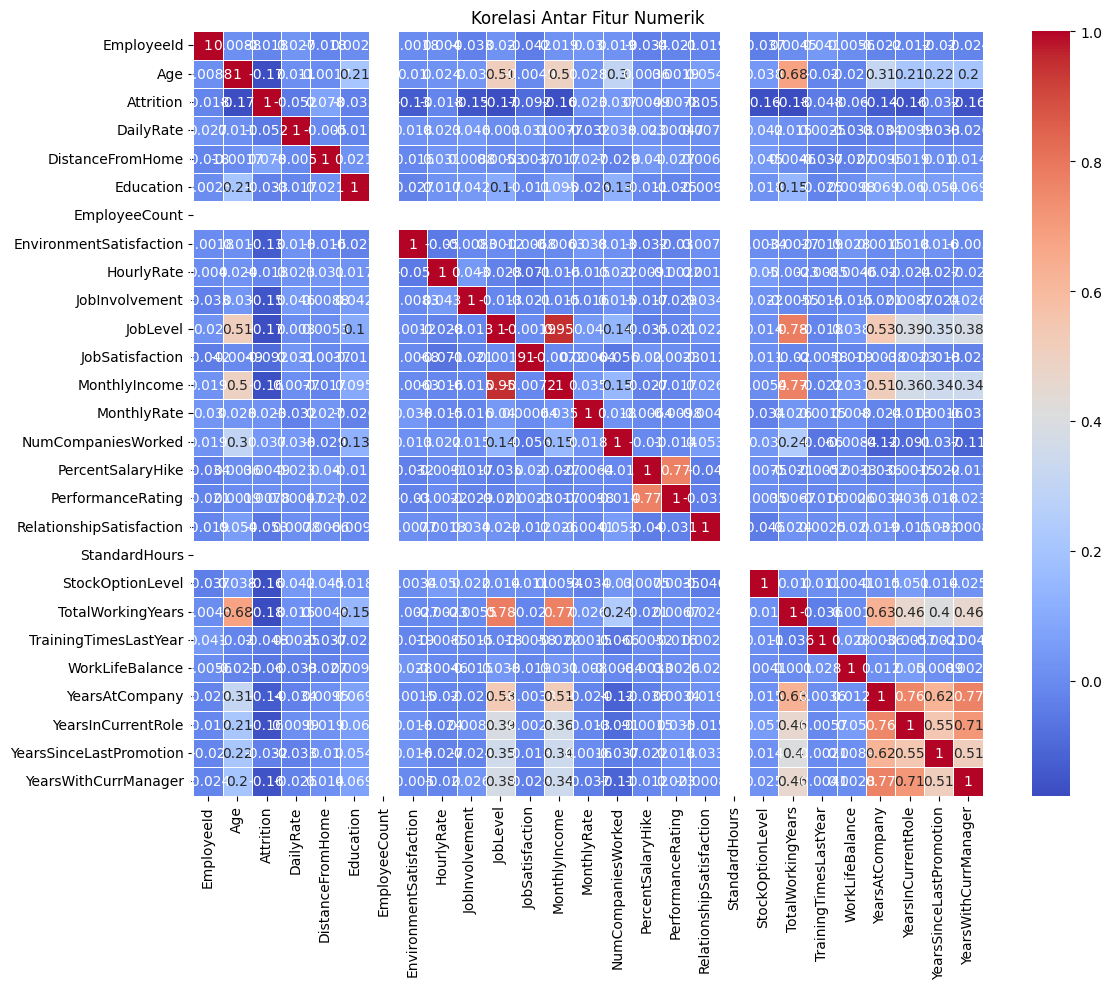

In [35]:
plt.figure(figsize=(12, 10))
korelasi_numerik = data.select_dtypes(include=[np.number]).corr()
sns.heatmap(korelasi_numerik, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Antar Fitur Numerik')
plt.tight_layout()
plt.show()

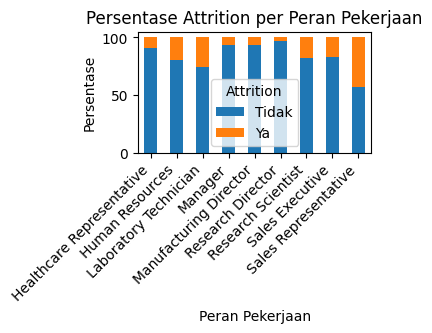

In [36]:
plt.subplot(2, 2, 2)
job_attrition = data.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
job_attrition_pct = job_attrition.div(job_attrition.sum(axis=1), axis=0) * 100
job_attrition_pct.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Persentase Attrition per Peran Pekerjaan')
plt.xlabel('Peran Pekerjaan')
plt.ylabel('Persentase')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attrition', labels=['Tidak', 'Ya'])

plt.tight_layout()
plt.show()

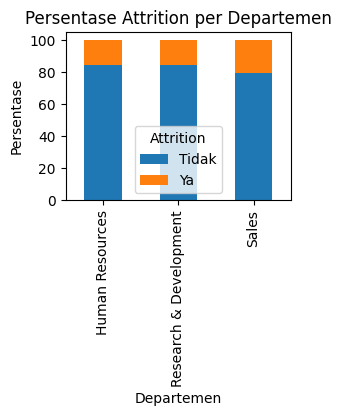

In [37]:
plt.subplot(2, 2, 1)
dept_attrition = data.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)
dept_attrition_pct = dept_attrition.div(dept_attrition.sum(axis=1), axis=0) * 100
dept_attrition_pct.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Persentase Attrition per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Persentase')
plt.legend(title='Attrition', labels=['Tidak', 'Ya'])

Text(0.5, 1.0, 'Distribusi Pendapatan Bulanan')

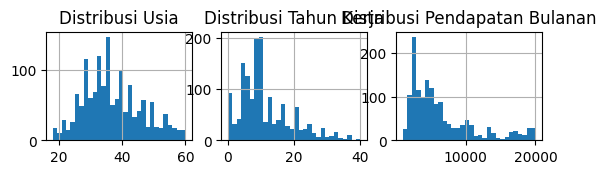

In [38]:
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
plt.subplot(3, 3, 1)
data['Age'].hist(bins=30)
plt.title('Distribusi Usia')

plt.subplot(3, 3, 2)
data['TotalWorkingYears'].hist(bins=30)
plt.title('Distribusi Tahun Kerja')

plt.subplot(3, 3, 3)
data['MonthlyIncome'].hist(bins=30)
plt.title('Distribusi Pendapatan Bulanan')

Text(0.5, 1.0, 'Pendapatan Bulanan vs Attrition')

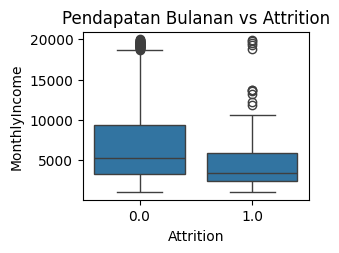

In [39]:
plt.subplot(2, 2, 1)
sns.boxplot(x='Attrition', y='MonthlyIncome', data=data)
plt.title('Pendapatan Bulanan vs Attrition')

In [40]:
print("\nStatistik Attrition per Departemen:")
print(data.groupby('Department')['Attrition'].value_counts(normalize=True).unstack() * 100)

print("\nStatistik Attrition per Peran Pekerjaan:")
print(data.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack() * 100)



Statistik Attrition per Departemen:
Attrition                     0.0        1.0
Department                                  
Human Resources         84.210526  15.789474
Research & Development  84.736091  15.263909
Sales                   79.310345  20.689655

Statistik Attrition per Peran Pekerjaan:
Attrition                        0.0        1.0
JobRole                                        
Healthcare Representative  90.909091   9.090909
Human Resources            80.000000  20.000000
Laboratory Technician      73.936170  26.063830
Manager                    93.670886   6.329114
Manufacturing Director     93.457944   6.542056
Research Director          96.774194   3.225806
Research Scientist         82.242991  17.757009
Sales Executive            83.189655  16.810345
Sales Representative       56.896552  43.103448


## Data Preparation

In [41]:
# Handling Missing Values
data['Attrition'].fillna(data['Attrition'].mode()[0], inplace=True)

# Encoding Variabel Kategorikal
le = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = le.fit_transform(data[col].astype(str))

# One-Hot Encoding
data = pd.get_dummies(data, drop_first=True)

# Scaling Fitur Numerik
scaler = StandardScaler()
numeric_columns = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate',
                   'JobLevel', 'StockOptionLevel', 'TotalWorkingYears']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


<ipython-input-41-b0be61d9ca94>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Attrition'].fillna(data['Attrition'].mode()[0], inplace=True)


## Modelling

In [42]:
# Pemisahan Fitur dan Target
X = data.drop(columns=['Attrition'])
y = data['Attrition']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisiasi dan Pelatihan Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluation

1. Accuracy Score: 0.8877551020408163

2. Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       262
         1.0       0.00      0.00      0.00        32

    accuracy                           0.89       294
   macro avg       0.45      0.50      0.47       294
weighted avg       0.79      0.89      0.84       294



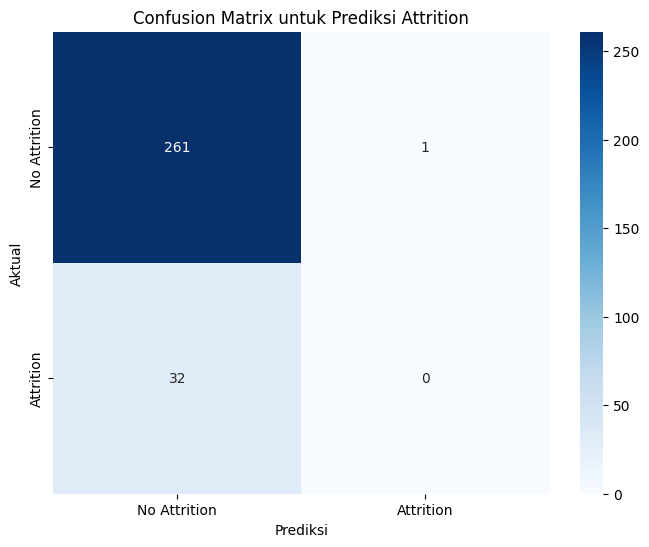

In [43]:
# Prediksi
y_pred = model.predict(X_test)

# Metrik Evaluasi
print("1. Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n2. Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.title('Confusion Matrix untuk Prediksi Attrition')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()